In [1]:
# DataSet => 1.loan_prediction, 2.Bengaluru_House_Data.csv', 3.car data.csv, 4.trainn.csv, 5.Cars_Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# EDA and Use ML steps.

In [4]:
# Working on Dataset('loan_prediction.csv') --> targe ==> Loan amount.

In [5]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Filling null values.

# Gender, Married, Dependents, Self_Employeed, LoanAmount, Loan_Amount_Term, Credit_History

# Gender
df['Gender'].fillna("Unknown", inplace = True)

# Married
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

# Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

# Self_Employeed
df['Self_Employed'].fillna("NA", inplace = True)

# LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

# Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

# Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Encoding
categorical = df.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])

df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1


In [11]:
# Outlier ==> zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

In [12]:
df.shape

(614, 12)

In [13]:
df1.shape

(577, 12)

In [14]:
# seperate input and output
X = df.drop('LoanAmount', axis = 1)
y = df['LoanAmount']

In [15]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,360.0,1.0,2,1
3,1,1,0,1,1,2583,2358.0,360.0,1.0,2,1
4,1,0,0,0,1,6000,0.0,360.0,1.0,2,1


In [16]:
y

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [17]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [18]:
# seperate training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [19]:
# import algo and fit train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
# calculation
cal = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Price', "Predicted_Price"])
cal

,Actual_Price,Predicted_Price
0,228.0,171.301363
1,130.0,134.604494
2,158.0,158.843277
3,71.0,108.744037
4,70.0,107.850842
...,...,...
118,42.0,104.292135
119,56.0,105.722485
120,123.0,155.872196
121,109.0,131.238776


In [22]:
# It is completed ------------------------------

In [23]:
##################################################3

In [24]:
# Working on next data ==> "BANGALORE HOUSE PRICE PREDICTION MODEL"

In [25]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [26]:
# Cleaning - EDA(Exploratory Data Analysis)

In [27]:
df1.shape

(13320, 9)

In [28]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [29]:
# This time study purpose ==> We don't need of these 4 columns, so drop these columns.

df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns') #axis="columns"/1/True
df2.shape

(13320, 5)

In [30]:
df2.isnull().sum() # Null values are very less so we dont need to fill, we can drop all these values.

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [31]:
df3 = df2.dropna()

In [32]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [33]:
df3.shape

(13246, 5)

In [34]:
# In this dataset we have size column, we have to extract number, 
    # so can split this column and consider 0th index.

# ex;
s1 = "3 bhk"
int(s1.split()[0])

3

In [35]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))
df3.bhk.unique() 

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [36]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [37]:
df3['bhk'].value_counts()

bhk
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [38]:
df3['total_sqft'].unique() # Dashes are present with numbers, remove these dashes.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
# we created a method to solve this.
def is_float(x):
    try:         # chances of error occuring is written in this try block.
        float(x) 
    except:      # Except block contains the code that specifies what to do when an error occurs.
        return False
    return True

In [40]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [41]:
# Handle this type of values ==> 3090-5002. ex.-->
s1 = '3090-5002'
x = s1.split('-')
(int(x[0])+int(x[1]))/2


4046.0

In [42]:
# Above data shows that total sqft can be a range (eg. 2100-2850). For such cases we can just take average 
  #  of min and max value in the range.
  # There are other cases where values are in sqm which can be converted to sqft using unit conversion.

In [43]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float (tokens[0]) + float(tokens[1]))/2 # here average
    try:
        return float(x)  # x != 2 ==> value will be correct value and it convert in float.
    except:
        return None # where x not present there None mean null value fill.

In [44]:
df4 = df3.copy() # Make a separate duplicate of the DataFrame so the original stays safe.
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num) # apply created function here. (average, convert in float, none)
df4 = df4[df4.total_sqft.notnull()] # All data retrieved, excluding null values.(clear data comes)
df4.shape

(13200, 6)

In [45]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [46]:
# Add new feature called price per square feet

In [47]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [48]:
# Examine locations which is a categorical variable. we need to apply the 
   # "dimensionality reduction" technique here to reduce the number of locations.

In [49]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending = False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [50]:
# Note --> less load on model, model will perform better.

In [51]:
location_stats.value_counts()

count
1      471
2      170
3      131
4       75
5       56
      ... 
53       1
50       1
392      1
45       1
46       1
Name: count, Length: 89, dtype: int64

In [52]:
len(location_stats[location_stats>10])

240

In [53]:
len(location_stats)

1287

In [54]:
len(location_stats[location_stats <= 10])

1047

In [55]:
# Dimensionality Reductions

# Any location having less than 10 data pints should be tagged as "other" location. This way number of 
   # categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with 
   # having fewer dummy columns.

In [56]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [57]:
len(df5.location.unique())

1287

In [58]:
df5.location = df5.location.apply(lambda x: 'unknown' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [59]:
df5.location.value_counts()

location
unknown            2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [60]:
df5['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [61]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [62]:
# after manager meeting 
df5['bhk'] = df5.bhk.apply(lambda x: x if x<=11 else np.nan)
df5.bhk.unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 10.])

In [63]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               8
price_per_sqft    0
dtype: int64

In [64]:
df5['bhk'].fillna(df5['bhk'].mode()[0], inplace = True)

In [65]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,unknown,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


In [66]:
# Outlier removal using Business logic

# As a Data Scientist, when you have a conversation with your business manager(who has expertise in real estate),
  # He will tell you that normally square ft per bedrooom is 300(i.e 2bhk apartment is minimum 600 sqt.). If you 
  # have for example 400 sqft apartment with 2bhk than that seems suspicious and can be removed as an outlier. 
  # we will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft.

In [67]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,unknown,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,unknown,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [68]:
df5.shape

(13200, 7)

In [69]:
# Check the above data points. We have 6 BHK apartments with 1020 sqft. another one is 8 bhk and the total sqft
  # is 600. These are clear data errors that can be removed safely.

In [70]:
df5.shape

(13200, 7)

In [71]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12462, 7)

In [72]:
# Outliers removal using bathroom feature.
df6.bath.unique()
# df6['bath'].value_counts().plot(kind = 'bar')

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 27., 12., 16.,
       40., 15., 10., 13., 18.])

Text(0, 0.5, 'Count')

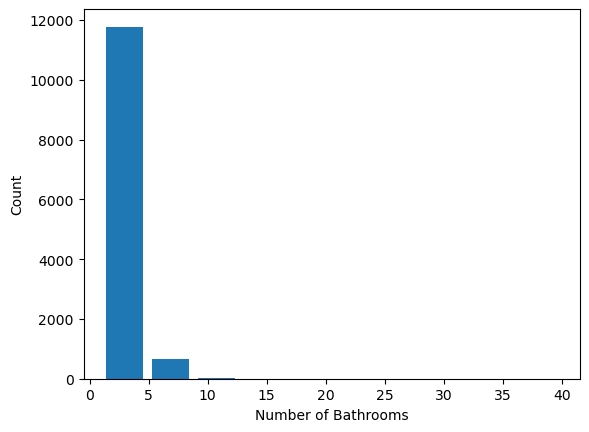

In [73]:
# Histogram of bath.
plt.hist(df6.bath,rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [74]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,unknown,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
1718,unknown,27 BHK,8000.0,27.0,230.0,2.0,2875.000000
3096,unknown,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
3379,unknown,19 BHK,2000.0,16.0,490.0,2.0,24500.000000
3609,unknown,16 BHK,10000.0,16.0,550.0,2.0,5500.000000
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,2.0,27500.000000
4916,unknown,14 BHK,1250.0,15.0,125.0,2.0,10000.000000
7979,unknown,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
9935,unknown,13 BHK,5425.0,13.0,275.0,2.0,5069.124424


In [75]:
# It is unusual to have 2 more Bathroom than number of bedrooms in a home
df6[df6.bath > df6.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,unknown,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
1718,unknown,27 BHK,8000.0,27.0,230.0,2.0,2875.000000
2620,unknown,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
3379,unknown,19 BHK,2000.0,16.0,490.0,2.0,24500.000000
3609,unknown,16 BHK,10000.0,16.0,550.0,2.0,5500.000000
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,2.0,27500.000000
4916,unknown,14 BHK,1250.0,15.0,125.0,2.0,10000.000000
6533,Mysore Road,12 Bedroom,2232.0,6.0,300.0,2.0,13440.860215
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5.0,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520


In [76]:
# Again the Business manager has a conversation with you (i.e. a data scientist) that if you have a 4bedrooom 
  # home and even if you have a bathroom in all 4 rooms plus one guest bathroom. You will have a total bath = 
  # total bed + 1 Max any thing above that is an outlier or a data error and can be removed.

In [77]:
df7 = df6[df6.bath < df6.bhk + 2]
df7.shape

(12301, 7)

In [78]:
# We have cleared all domain of domain knowledge.

In [79]:
# Now drop unneccessary columns.
df8 = df7.drop(['size', 'price_per_sqft'], axis = 'columns')
df8.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0


In [80]:
# now we are going towards ML steps.

In [81]:
# for label Encoding, find categorical data from the dataset.
categorical = df8.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df8['location'] = le.fit_transform(df8['location']) # this code is used when only one column is categorical. 

# for i in categorical:
    # df8[i] = le.fit_transform(df8[i])

df8.head(3)

,location,total_sqft,bath,price,bhk
0,79,1056.0,2.0,39.07,2.0
1,60,2600.0,5.0,120.00,4.0
2,225,1440.0,2.0,62.00,3.0


In [82]:
# zscore
#from scipy.stats import zscore
#z = np.abs(zscore(df8))
#df9 = df8[(z<3).all(axis = 1)]

In [83]:
df8.shape

(12301, 5)

In [84]:
# we dont need of zscore because we already remove outliers using domain knowledge.

In [85]:
# split input and output
X = df8.drop('price', axis = 1)
y = df8['price']

In [86]:
# Scaling --> use StandardScaler ==> fit_transform(X)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [87]:
# model_selection ==> train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [88]:
# use algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_test)

In [90]:
# calculation
cal = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Price', 'Predicted Price'])
cal

,Original Price,Predicted Price
0,18.0,2.986041
1,23.5,-5.324339
2,128.0,59.940366
3,45.0,70.948938
4,75.0,57.978599
...,...,...
2456,95.0,70.461644
2457,155.0,158.848079
2458,72.0,54.604003
2459,115.0,92.452253


In [91]:
# If prediction values is in negative then its mean your algo is wrong or LinearRegression is not working on this type of dataset.

In [92]:
# It is completed ==> as much as i learned.

In [93]:
# Now working on next data ==> car data.csv

In [94]:
df = pd.read_csv("car data.csv")
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [95]:
# Target column ==> Selling_Price

In [96]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [97]:
# Encoding
categorical = df.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical:
    df[i] = le.fit_transform(df[i])

df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0


In [98]:
# ZScore 
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

In [99]:
df.shape

(301, 9)

In [100]:
df1.shape

(273, 9)

In [101]:
df = df1.copy()

In [102]:
# Split input and output
X = df.drop('Selling_Price', axis = 1)
y = df['Selling_Price']

In [103]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [104]:
# Model_Selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [105]:
# use algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = lr.predict(X_test)

In [107]:
# calculation
cal = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Selling Price', 'Predicted Selling Price'])
cal

,Original Selling Price,Predicted Selling Price
0,2.35,1.908364
1,0.65,1.257500
2,5.85,8.885790
3,2.00,2.695343
4,5.35,6.664268
5,0.48,1.006511
6,4.80,4.686129
7,7.75,6.675877
8,3.50,4.081178
9,9.70,8.383730


In [108]:
# It is completed as much as i learned.

In [109]:
##################################################33

In [110]:
# Now working on next dataset ==> "trainn.csv"

In [111]:
df = pd.read_csv('trainn.csv') 
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [112]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [113]:
df.dropna(inplace = True)

In [114]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [115]:
# "fare_amount" column is the target column

In [116]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [117]:
df.drop('key', inplace = True, axis = 1)

In [118]:
df.head(3)

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [ ]:
df['Pickup_day'] = pd.to_datetime(df['pickup_datetime']).dt.day
df['Pickup_month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['Pickup_year'] = pd.to_datetime(df['pickup_datetime']).dt.year
df['Pickup_day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['Pickup_month_name'] = pd.to_datetime(df['pickup_datetime']).dt.month_name()

df['Pickup_Hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
df['Pickup_Minutes'] = pd.to_datetime(df['pickup_datetime']).dt.minute

df.drop('pickup_datetime', axis = 1, inplace = True)
df.head(3)

In [ ]:
df.drop('pickup_longitude', axis = 1, inplace = True)
df.drop('pickup_latitude', axis = 1, inplace = True)

df.head(3)

In [ ]:
df1 = df[["fare_amount", "passenger_count", "Pickup_day", "Pickup_month", "Pickup_year", "Pickup_day_name", "Pickup_month_name", "Pickup_Hour", "Pickup_Minutes"]]
df1.head(3)

In [ ]:
# day_name ko manually encode karta hai.
df1['Pickup_day_name'] = df1['Pickup_day_name'].replace({"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6})

In [ ]:
df1.head(5)

In [ ]:
# month_name ko manually encode karta hai.
df1['Pickup_month_name'] = df1['Pickup_month_name'].replace({"January":0, "February":1, "March":2, "April":3, "Thursday":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12})

In [ ]:
df1.head(5)

In [ ]:
# There is no categorical so encoding is done by manually.
# zscore
from scipy.stats import zscore
z = np.abs(zscore(df1))
df2 = df1[(z<3).all(axis = 1)]

In [ ]:
df1.shape

In [ ]:
df2.shape

In [ ]:
# Split
X = df2.drop('fare_amount', axis = 1)
y = df2['fare_amount']

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
# Model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [ ]:
# use algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = lr.predict(X_test)

In [ ]:
# calculation
cal = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Amount', 'Predicted Amount'])
cal

In [ ]:
# This is completed =====================

In [ ]:
#################################################33

In [ ]:
# Now working on next dataset

In [ ]:
# There are many files and we want to read in one frame ==> Standard Code.

In [ ]:
# This is for warnings.

%matplotlib inline

In [ ]:
# This is capstone project "Cars_Data" ==> All 9 cars data files combine with build model.

In [ ]:
# Load Data
# Printing the file names in the Data Folder to the Screen.
# Printing all files.
all_files = []
for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        all_files.append(file)
        print(file)

In [ ]:
# Another code for print all csv files to the Screen.
all_files = []
for x in os.listdir('./Cars_Data'):  
    all_files.append(x)
    print(x)

In [ ]:
os.getcwd()

In [ ]:
# Overview of columns and data types of CSV files

for i in all_files:
    print(i)
    pd.read_csv('C:\\Users\\ABHISHEK CHAUDHARY\\Desktop\\Gen-AI Madrid Sof\\Python\\Machine Learning\\Cars_Data/'+i)
    print(pd.read_csv('C:\\Users\\ABHISHEK CHAUDHARY\\Desktop\\Gen-AI Madrid Sof\\Python\\Machine Learning\\Cars_Data/'+i).info())

In [ ]:
# Converting each csv file to Pandas DataFrame

df_vw = pd.read_csv('./Cars_Data/vw.csv')
df_merc = pd.read_csv('./Cars_Data/merc.csv')
df_bmw = pd.read_csv('./Cars_Data/bmw.csv')
df_toyota = pd.read_csv('./Cars_Data/toyota.csv')
df_skoda = pd.read_csv('./Cars_Data/skoda.csv')
df_vauxhall = pd.read_csv('./Cars_Data/vauxhall.csv')
df_hyundi = pd.read_csv('./Cars_Data/hyundi.csv')
df_audi = pd.read_csv('./Cars_Data/audi.csv')
df_ford = pd.read_csv('./Cars_Data/ford.csv')

In [ ]:
# update different column names which on same data
df_hyundi.rename(columns = {'tax(£)':'tax'}, inplace = True)

In [ ]:
# Add a brand column ==> data owns the brand.
df_vw['brand'] = 'vw'
df_merc['brand'] = 'merc'
df_bmw['brand'] = 'brand'
df_toyota['brand'] = 'toyota'
df_skoda['brand'] = 'skoda'
df_vauxhall['brand'] = 'vauxhall'
df_hyundi['brand'] = 'hyundi'
df_audi['brand'] = 'audi'
df_ford['brand'] = 'ford'

In [ ]:
# Combine Data 
# Merge pieced data from different brands

df = pd.concat([df_vw, df_merc, df_bmw, df_toyota, df_skoda, df_vauxhall, df_hyundi, df_audi, df_ford], ignore_index = True)
df.head(3)

In [ ]:
# Rearrange Column names. ==> Edit column location
df = df[['brand', 'model', 'year', 'price', 
         'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]

In [ ]:
df.head(3)

In [ ]:
# Cleaning Data
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
# Check value count 
df['year'].value_counts()

In [ ]:
# let's delete these rows as there is outlier data and insufficient data before 2000.
df.drop(df[(df['year'] == 2060) | (df['year'] <= 2000)].index, axis = 0, inplace = True)

In [ ]:
df['year'].value_counts()

In [ ]:
# Check duplicate data
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

In [ ]:
# Three column that has same entries.
df[(df.brand == 'vw') & (df.year == 2018) & (df.price == 18695)]

In [ ]:
# Deleting duplicated data
df = df.drop_duplicates(ignore_index = True) # by default "keep = first" hota hai.
df

In [ ]:
import plotly.express as px # It is a dynamic library.
fig = px.histogram(df, x = 'brand', hover_data = df.columns)
fig.update_layout(title = 'Quantitative representation of the number of vehicles per brands')
fig.show()

In [ ]:
brand_model_org = df.groupby(by = ['brand', 'model', 'year'], 
                             as_index = False).agg({'price':pd.Series.count})
brand_model_org

In [ ]:
brand_model_org.rename(columns = {'price':'count'}, inplace = True)

In [ ]:
burst = px.sunburst(brand_model_org,
                   path = ['brand', 'model', 'year'], 
                   values = 'count', 
                   title = 'Model Distribution of Brands and an Overview of the Vehicles Year', 
                   width = 1000,
                   height = 800,)

burst.show()

In [ ]:
# Box plot
box = px.box(df, x = 'brand', y = 'price', title = 'Average Price per Brand')
box.update_layout(xaxis_title = 'Brand', yaxis_title = 'Price',
                 xaxis = {'categoryorder':'max descending'},
                 yaxis = dict(type = 'log'))
box.show()

In [ ]:
# Histogram
px.histogram(df, x = 'mpg', marginal = 'box') # upper => boxplot, lower => histogram

In [ ]:
# As we can see from the graph, there are outliers in mpg.value. We'll replace them with NaN and fill them

In [ ]:
q1 = df.mpg.quantile(0.15)
q3 = df.mpg.quantile(0.85)
iqr = q3 - q1
print("q1", q1)
print("q3", q3)
print("inter-quartile range: ", iqr)

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("lower bound: ", lower_bound)
print("upper bound: ", upper_bound)

In [ ]:
df[(df['mpg'] <= 6.95) | (df['mpg'] >= 100.95)].value_counts()

In [ ]:
df[(df['mpg'] <= 6.95) | (df['mpg'] >= 100.95)]

In [ ]:
df.mpg = df.mpg.map(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

In [ ]:
px.histogram(df, x = 'mpg', marginal = 'box')

In [ ]:
df.mpg = df.mpg.fillna(df.mpg.median())

In [ ]:
px.histogram(df, x = 'engineSize', marginal = 'box')

In [ ]:
(df['engineSize'] == 0).value_counts()

In [ ]:
df.drop(df[(df['engineSize'] == 0)].index, axis = 0, inplace = True)

In [ ]:
px.histogram(df, x = 'price', marginal = 'box')

In [ ]:
px.histogram(df, x = 'year', marginal = 'box')

In [ ]:
df.info()

In [ ]:
# Encoding 
categorical = df.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])

df.head(3)

In [ ]:
# Zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

In [ ]:
df.shape

In [ ]:
df1.shape

In [ ]:
print(df.shape)
print(df1.shape)

In [ ]:
df = df1.copy()

In [ ]:
# Split input and input
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
df.head()

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
# Model Selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

In [ ]:
# use algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# predict
y_pred = lr.predict(X_test)

In [ ]:
# Calculation
cal = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Price', 'Predicted Price'])
cal

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('\n')
print('R2 Score: ')
print(r2_score(y_test, y_pred))

In [ ]:
# These are only examples right now for accuracy check. ==> DT and RF are both examples for accuracy check.
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))